In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from nn import *
from matplotlib.ticker import ScalarFormatter
np.random.seed(100)
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2


In [19]:
# Load all the data
train_data, train_labels = read_data('./images_train.csv', './labels_train.csv')
train_labels = one_hot_labels(train_labels)
p = np.random.permutation(60000)
train_data = train_data[p,:]
train_labels = train_labels[p,:]

dev_data = train_data[0:10000,:]
dev_labels = train_labels[0:10000,:]
train_data = train_data[10000:,:]
train_labels = train_labels[10000:,:]

mean = np.mean(train_data)
std = np.std(train_data)
train_data = (train_data - mean) / std
dev_data = (dev_data - mean) / std

test_data, test_labels = read_data('./images_test.csv', './labels_test.csv')
test_labels = one_hot_labels(test_labels)
test_data = (test_data - mean) / std

all_data = {
    'train': train_data,
    'dev': dev_data,
    'test': test_data
}

all_labels = {
    'train': train_labels,
    'dev': dev_labels,
    'test': test_labels,
}

In [52]:
# Search through learning rates
lrs = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = {}
num_epochs = 20
plot = False

algos = ['LMS', '%LMS']

for algo in algos:
    algo_dict = defaultdict(list)
    for lr in lrs:
        print("Learning rate: ", lr, 'Algo: ', algo)
        accuracy, cost_train, cost_dev, accuracy_train, accuracy_dev = run_train_test(algo, all_data, all_labels, backward_prop, num_epochs, plot, learning_rate=lr)
        algo_dict['Test Accuracy'].append(accuracy)
        algo_dict['Train Accuracy'].append(accuracy_train)
        algo_dict['Dev Accuracy'].append(accuracy_dev)
        algo_dict['Dev Loss'].append(cost_dev)
        algo_dict['Train Loss'].append(cost_train)
        results[algo] = algo_dict

Learning rate:  0.01 Algo:  LMS
0 / 20 train loss:  10.204900201891205 dev loss:  10.132572310751769
1 / 20 train loss:  1.77381774199337 dev loss:  1.7997008359250648
2 / 20 train loss:  1.2123975942633407 dev loss:  1.2508720976460128
3 / 20 train loss:  0.9762246700161704 dev loss:  1.0293697369341044
4 / 20 train loss:  0.8384820578757496 dev loss:  0.9058277132866149
5 / 20 train loss:  0.7470643068842123 dev loss:  0.8253814543937362
6 / 20 train loss:  0.6801689077519093 dev loss:  0.7678611893591891
7 / 20 train loss:  0.6280132468244085 dev loss:  0.7247047981708373
8 / 20 train loss:  0.5858908475264752 dev loss:  0.6901141651759847
9 / 20 train loss:  0.551042533987409 dev loss:  0.6613671205944204
10 / 20 train loss:  0.5216522383138016 dev loss:  0.6369414949683685
11 / 20 train loss:  0.49642820305883756 dev loss:  0.615833972105072
12 / 20 train loss:  0.4744800297083415 dev loss:  0.5973927824605616
13 / 20 train loss:  0.4551364976559474 dev loss:  0.5811318308001704
1

In [53]:
results

{'LMS': defaultdict(list,
             {'Test Accuracy': [0.8707,
               0.9093,
               0.9177,
               0.9426,
               0.9591,
               0.952,
               0.9434,
               0.9249,
               0.894,
               0.8588,
               0.8838,
               0.883,
               0.8394,
               0.8451],
              'Train Accuracy': [0.8974,
               0.95442,
               0.97084,
               0.99362,
               0.9856,
               0.9683,
               0.95956,
               0.93352,
               0.90074,
               0.86634,
               0.893,
               0.87814,
               0.8408,
               0.8392],
              'Dev Accuracy': [0.8676,
               0.9048,
               0.9156,
               0.9431,
               0.9589,
               0.9528,
               0.9457,
               0.9205,
               0.8974,
               0.8615,
               0.8841,
               0.880

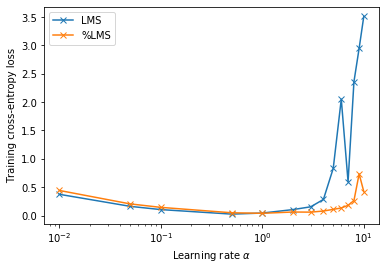

In [57]:
# Plot the training loss and plot the accuracy as a function of learning rates
fig, ax = plt.subplots()
for algo in algos:
    train_loss = results[algo]['Train Loss']
    plt.semilogx(lrs, train_loss, 'x-', label=algo)
plt.legend()
plt.xlabel(r'Learning rate $\alpha$')
plt.ylabel('Training cross-entropy loss')
plt.savefig('mnist_loss_lr.png', dpi=200)
# ax.xaxis.set_major_formatter(ScalarFormatter())

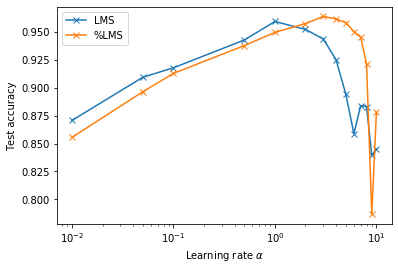

In [64]:
# Plot the accuracy as a function of learning rates
for algo in algos:
    train_loss = results[algo]['Test Accuracy']
    plt.semilogx(lrs, train_loss, 'x-', label=algo)
plt.legend()
plt.xlabel(r'Learning rate $\alpha$')
plt.ylabel('Test accuracy')
plt.savefig('mnist_acc_lr.png', dpi=200)